In [ ]:
!nvidia-smi

Sun Jun 16 07:26:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv10

**NOTE:** Currently, YOLOv10 does not have its own PyPI package. Therefore, we need to install the code from the source.

In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 57.0 MB/s eta 0:00:00


In [ ]:
!pip install -q supervision roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.8 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76


## Download pre-trained weights

**NOTE:** YOLOv10 provides weight files pre-trained on the COCO dataset in various sizes. Let's download them.

In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt


## Inference with Pre-trained COCO Model

**NOTE:** YOLOv10 is based on YOLOv8, and like YOLOv8, it can be used in both CLI and SDK modes.

### 💻 CLI

In [ ]:
%cd {HOME}

!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={HOME}/test_yolo.jpg

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2762608 parameters, 63840 gradients, 8.6 GFLOPs

image 1/1 /content/test_yolo.jpg: 352x640 3 persons, 10 cars, 140.6ms
Speed: 3.8ms preprocess, 140.6ms inference, 468.1ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


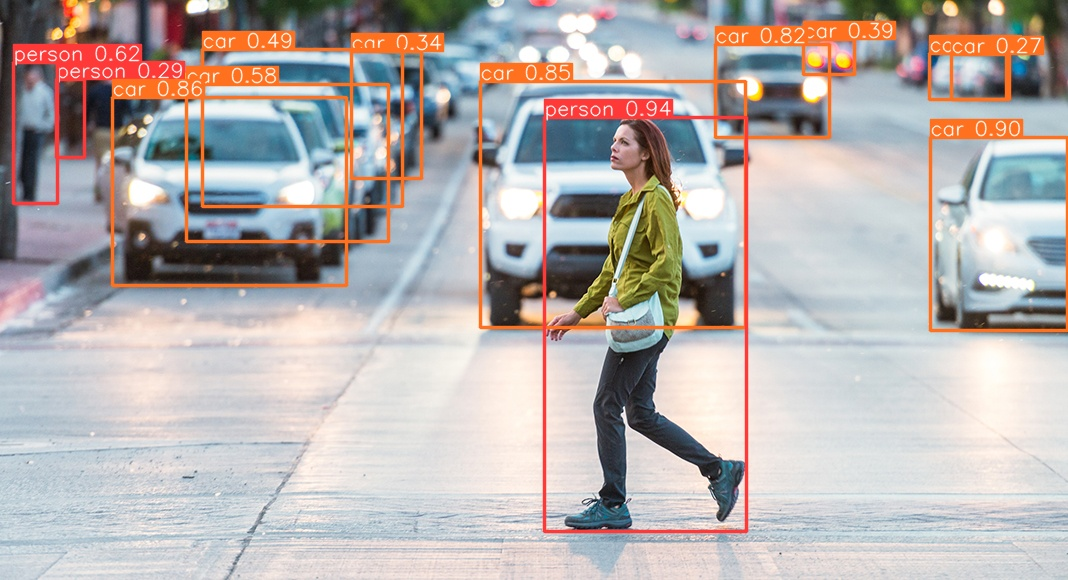

In [ ]:
%cd {HOME}

from IPython.display import Image

Image(filename='/content/runs/detect/predict/test_yolo.jpg', height=600)

In [ ]:
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
results = model(source=f'{HOME}/test_yolo.jpg', conf=0.25)


image 1/1 /content/test_yolo.jpg: 352x640 3 persons, 10 cars, 102.7ms
Speed: 2.7ms preprocess, 102.7ms inference, 327.5ms postprocess per image at shape (1, 3, 352, 640)


In [ ]:
results[0].boxes.xyxy

tensor([[ 544.6576,  117.8542,  746.7574,  531.0239],
        [ 930.5779,  137.2526, 1067.3751,  330.1963],
        [ 112.2663,   97.6408,  346.8195,  285.9696],
        [ 480.2688,   81.7648,  745.7219,  327.2065],
        [ 715.8035,   44.4851,  829.8182,  137.1299],
        [  13.9913,   62.6202,   57.9990,  203.7209],
        [ 186.2921,   84.7474,  388.8169,  241.9286],
        [ 202.2732,   49.4932,  402.4592,  206.1523],
        [ 803.4048,   39.3917,  854.9930,   74.6698],
        [ 351.9703,   51.9383,  421.5683,  178.2129],
        [  56.6436,   79.9370,   84.9476,  157.9052],
        [ 951.3262,   54.0956, 1009.4594,   99.0576],
        [ 929.2438,   53.5123, 1006.3889,   99.6202]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.9366, 0.8998, 0.8637, 0.8508, 0.8172, 0.6217, 0.5793, 0.4914, 0.3850, 0.3360, 0.2925, 0.2735, 0.2655], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([0., 2., 2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2.], device='cuda:0')

**NONE:** Let's display result using `supervision`.


0: 352x640 3 persons, 10 cars, 12.9ms
Speed: 2.5ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)


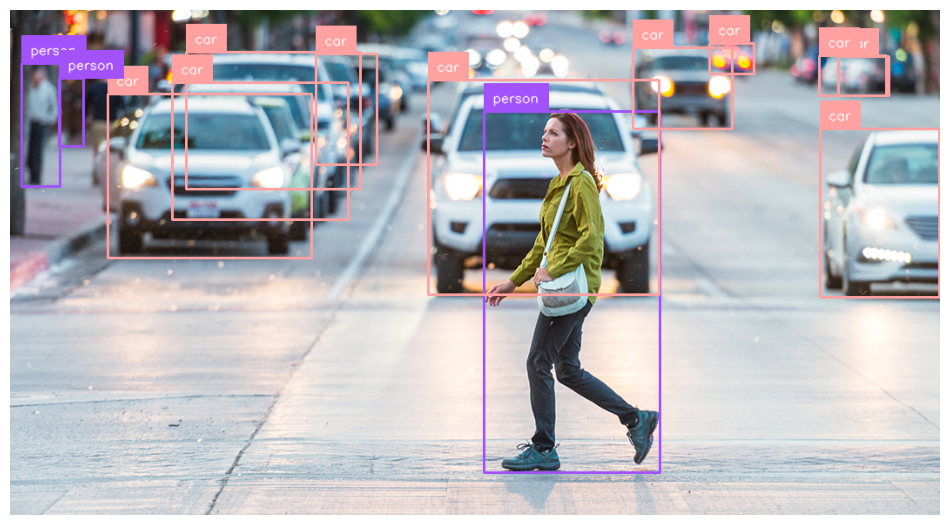

In [ ]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
image = cv2.imread(f'{HOME}/test_yolo.jpg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

## Download dataset from Roboflow Universe

In [ ]:
#fine tuning on this dataset

!pip install roboflow --q

!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="PREtYuS13VXPKlpKYGKD")
project = rf.workspace("neevd").project("neevd")
version = project.version(3)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`


Extracting Dataset Version Zip to NEEVD-3 in yolov8:: 100%|██████████| 3944/3944 [00:00<00:00, 8885.19it/s]


In [ ]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=10 batch=32 plots=True \
model={HOME}/weights/yolov10n.pt \
data={dataset.location}/data.yaml

/content
New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10n.pt, data=/content/datasets/NEEVD-3/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, r

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    labels_correlogram.jpg  weights
events.out.tfevents.1718449794.9f509d2255e2.1686.0  labels.jpg


# Gradio

In [ ]:
!pip install gradio --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.2 MB/s

In [ ]:
import cv2
import numpy as np
from PIL import Image
import supervision as sv
from ultralytics import YOLOv10

# Initialize YOLO model and annotators
model = YOLOv10('/content/weights/yolov10n.pt')
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Function to perform inference and annotate image
def yolo_inference(image):
    """
    Performs YOLOv10 inference on an image and returns the annotated image.

    Args:
        image: A PIL Image object representing the input image.

    Returns:
        A PIL Image object with bounding boxes and labels for detected objects,
        or None if errors occur.
    """

    try:
        # Convert image to numpy array for YOLO model (if needed)
        if isinstance(image, np.ndarray):
            image_array = image
        else:
            image_array = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

        # Perform YOLO inference using Ultralytics
        results = model(image_array)[0]
        detections = sv.Detections.from_ultralytics(results)

        # Annotate image with bounding boxes and labels
        annotated_image = bounding_box_annotator.annotate(scene=image_array, detections=detections)
        annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

        # Convert annotated image back to PIL format for Gradio output
        if isinstance(annotated_image, np.ndarray):
            annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
            return Image.fromarray(annotated_image)
        else:
            return annotated_image  # Assuming already a PIL Image

    except Exception as e:
        print(f"An error occurred during inference: {e}")
        return None  # Or consider returning a placeholder image

import gradio as gr

# Define Gradio interface (adjusted for Gradio v3)
interface = gr.Interface(
    fn=yolo_inference,  # Function to execute
    inputs="image",  # Input type (image)
    outputs="image",  # Output type (image)
    title="YOLOv10 Inference",
    description="Upload an image for YOLOv10 object detection and annotation",
)

# Launch the Gradio app
interface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://e3b1625b5dd39b6748.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)



0: 448x640 1 person, 1 bicycle, 102.4ms
Speed: 3.3ms preprocess, 102.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 5 persons, 1 car, 1 truck, 1 handbag, 11.0ms
Speed: 5.2ms preprocess, 11.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://e3b1625b5dd39b6748.gradio.live
